In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Point
import contextily as ctx

In [17]:
# Read data sets
zipcodes = pd.read_csv('/Users/yaoyuxin/Desktop/DSCI510/Yao_Yuxin_proj3/csv/lazip.csv')
population = pd.read_csv('/Users/yaoyuxin/Desktop/DSCI510/Yao_Yuxin_proj3/csv/la_population.csv')
median_income = pd.read_csv('/Users/yaoyuxin/Desktop/DSCI510/Yao_Yuxin_proj3/csv/la_median_income.csv')
houseprices = pd.read_csv('/Users/yaoyuxin/Desktop/DSCI510/Yao_Yuxin_proj3/csv/ca_house_price.csv')
traderjoes = pd.read_csv('/Users/yaoyuxin/Desktop/DSCI510/Yao_Yuxin_proj3/csv/trader_joes_locations.csv')
stadiums = pd.read_csv('/Users/yaoyuxin/Desktop/DSCI510/Yao_Yuxin_proj3/csv/yelp_stadium_los_angeles.csv')
coffee = pd.read_csv('/Users/yaoyuxin/Desktop/DSCI510/Yao_Yuxin_proj3/csv/yelp_coffee_los_angeles.csv')

In [7]:
print(zipcodes.head())


   zip_code        country country abbreviation         city  longitude  \
0     90001  United States                   US  Los Angeles  -118.2479   
1     90002  United States                   US  Los Angeles  -118.2462   
2     90003  United States                   US  Los Angeles  -118.2727   
3     90004  United States                   US  Los Angeles  -118.3029   
4     90005  United States                   US  Los Angeles  -118.3012   

        state state abbreviation  latitude  
0  California                 CA   33.9731  
1  California                 CA   33.9497  
2  California                 CA   33.9653  
3  California                 CA   34.0762  
4  California                 CA   34.0585  


In [9]:
print(population.head())

   zip_code                                         place_name  population
0     90001   Los Angeles (South Los Angeles), Florence-Graham       57652
1     90002         Los Angeles (Southeast Los Angeles, Watts)       53108
2     90003  Los Angeles (South Los Angeles, Southeast Los ...       75024
3     90004  Los Angeles (Hancock Park, Rampart Village, Vi...       58833
4     90005  Los Angeles (Hancock Park, Koreatown, Wilshire...       37754


In [10]:
print(median_income.head())

   zip_code  median_income
0     90001          57698
1     90002          54221
2     90003          51275
3     90004          58420
4     90005          49226


In [11]:
print(houseprices.head())

   house_id  house_street  zip_code   price  bed  bath  house_size  acre_lot
0         1        987585     92225  172999    3     2        1132         0
1         2        761139     92225  201000    2     2        1100         0
2         3       1002149     92225  250000    7     3        3126         0
3         4        664584     92225  325000    3     2        1925         5
4         5       1230938     92225  287500    5     3        1642         0


In [12]:
print(traderjoes.head())

                         store_name                      store_address  \
0   Trader Joe's Agoura Hills (247)     28941 Canwood St, Agoura Hills   
1        Trader Joe's Alameda (109)   2217 South Shore Center, Alameda   
2    Trader Joe's Aliso Viejo (195)  26541 Aliso Creek Rd, Aliso Viejo   
3  Trader Joe's Arroyo Grande (117)     955 Rancho Pkwy, Arroyo Grande   
4     Trader Joe's Bakersfield (14)    8200 Stockdale Hwy, Bakersfield   

   zip_code  store_number  
0     91301         247.0  
1     94501         109.0  
2     92656         195.0  
3     93420         117.0  
4     93311          14.0  


In [13]:
print(stadiums.head())

               stadium_id                         stadium_name  zip_code  \
0  xnZ6z5W6GmKbwwnigdIGjQ                          BMO Stadium     90037   
1  F9Xh2eJQNRD29hHIUrTzNw        Los Angeles Memorial Coliseum     90037   
2  8K-hGg2RwtWDAd-IkJpl6Q            Los Angeles Football Club     90037   
3  yALdZ_TH79lj3xU2-hml0w                     Aspire Athletics     90044   
4  ZRUuCLLQVY_teZ4P0yb0pA  Mariachi Garibaldi de Jaime Cuellar     90640   

                                   stadium_address  
0  ['3939 S Figueroa St', 'Los Angeles, CA 90037']  
1  ['3911 S Figueroa St', 'Los Angeles, CA 90037']  
2  ['3939 S Figueroa St', 'Los Angeles, CA 90037']  
3                        ['Los Angeles, CA 90044']  
4  ['2605 W Beverly Blvd', 'Montebello, CA 90640']  


In [19]:
print(coffee.head())


                coffee_id         coffee_name zip_code  \
0  3gI3JkMZ0YO8Pb07CDyo1Q   Coffee and Chisme    90280   
1  fuAL8-5XTZVao9KZyVa84w         Cafe Oaxaca    90002   
2  iC-VRLuzCVGKhLmeIk_WBA        milk+cookies    90280   
3  elu_CU6oNbMzLIiDtNy3ww    Coffee Del Mundo    90044   
4  FMlrSy0HN9Mj2z9BTKIXfg  TLC Coffee Company    90001   

                                     coffee_address  \
0         ['8450 State St', 'South Gate, CA 90280']   
1  ['1211 E Century Blvd', 'Los Angeles, CA 90002']   
2      ['4331 Tweedy Blvd', 'South Gate, CA 90280']   
3   ['7414 S Vermont Ave', 'Los Angeles, CA 90044']   
4                      ['Firestone Park, CA 90001']   

   attributes.business_temp_closed  
0                              NaN  
1                              NaN  
2                              NaN  
3                              NaN  
4                              NaN  


In [ ]:
# Merge data sets


In [306]:
# Add a new column for unit price
houseprices['unit_price'] = houseprices['price'] / houseprices['house_size']
houseprices.head()

,house_id,house_street,zip_code,price,bed,bath,house_size,acre_lot,unit_price
0,1,987585,92225,172999,3,2,1132,0,152.825972
1,2,761139,92225,201000,2,2,1100,0,182.727273
2,3,1002149,92225,250000,7,3,3126,0,79.974408
3,4,664584,92225,325000,3,2,1925,5,168.831169
4,5,1230938,92225,287500,5,3,1642,0,175.091352


In [307]:
# get the median unit price of each zipcode
median_unit_price = houseprices.groupby('zip_code')['unit_price'].median().reset_index()
median_unit_price = median_unit_price.rename(columns={'unit_price': 'median_unit_price'})
median_unit_price

,zip_code,median_unit_price
0,90001,422.932331
1,90002,460.168983
2,90003,372.571340
3,90004,657.307930
4,90005,626.398210
...,...,...
1645,96146,825.892857
1646,96148,631.819782
1647,96150,464.478613
1648,96161,596.198562


In [308]:
# number of trader joes in each zipcode
num_traderjoes = traderjoes.groupby('zip_code').size().reset_index()
num_traderjoes = num_traderjoes.rename(columns={0: 'num_traderjoes'})
num_traderjoes

,zip_code,num_traderjoes
0,90024,1
1,90027,1
2,90028,1
3,90034,1
4,90036,2
...,...,...
181,95757,1
182,95819,1
183,95821,1
184,95926,1


In [309]:
# number of stadiums in each zipcode
num_stadiums = stadiums.groupby('zip_code').size().reset_index()
num_stadiums = num_stadiums.rename(columns={0: 'num_stadiums'})
num_stadiums


,zip_code,num_stadiums
0,90001,1
1,90005,1
2,90007,5
3,90008,1
4,90012,27
...,...,...
207,93311,2
208,93536,1
209,93551,2
210,93560,1


In [310]:
# count the number of coffee shops in each zipcode
num_coffee = coffee.groupby('zip_code').size().reset_index()
num_coffee = num_coffee.rename(columns={0: 'num_coffee'})
num_coffee

,zip_code,num_coffee
0,90001,4
1,90002,1
2,90003,1
3,90004,5
4,90005,3
...,...,...
322,93552,2
323,93553,1
324,93560,2
325,93561,5


In [311]:
# show the type of each column
print(num_coffee.dtypes)
# change zip_code to int
# change 90201-7617 to 90201
num_coffee['zip_code'] = num_coffee['zip_code'].str.split('-').str[0]
num_coffee['zip_code'] = num_coffee['zip_code'].astype(int)
num_coffee

zip_code      object
num_coffee     int64
dtype: object


,zip_code,num_coffee
0,90001,4
1,90002,1
2,90003,1
3,90004,5
4,90005,3
...,...,...
322,93552,2
323,93553,1
324,93560,2
325,93561,5


In [312]:
# merge the data
merged1 = pd.merge(population, median_income, on='zip_code', how='left')
# fill na with 0
merged1 = merged1.fillna(0)
merged1

,zip_code,Place Name,population,median_income
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",57652,57698.0
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",53108,54221.0
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",75024,51275.0
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",58833,58420.0
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",37754,49226.0
...,...,...,...,...
292,93551,"City Ranch, Leona Valley, Palmdale",54478,107133.0
293,93552,Palmdale,43371,85890.0
294,93553,"Juniper Hills, Pearblossom",1136,71587.0
295,93563,"Pearblossom, Valyermo",222,0.0


In [313]:
merge2 = pd.merge(merged1, median_unit_price, on='zip_code', how='left')
merge2

,zip_code,Place Name,population,median_income,median_unit_price
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",57652,57698.0,422.932331
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",53108,54221.0,460.168983
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",75024,51275.0,372.571340
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",58833,58420.0,657.307930
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",37754,49226.0,626.398210
...,...,...,...,...,...
292,93551,"City Ranch, Leona Valley, Palmdale",54478,107133.0,259.531465
293,93552,Palmdale,43371,85890.0,269.749518
294,93553,"Juniper Hills, Pearblossom",1136,71587.0,43.474883
295,93563,"Pearblossom, Valyermo",222,0.0,295.358299


In [314]:
merge3 = pd.merge(merge2, num_traderjoes, on='zip_code', how='left')
# fill na with 0
merge3 = merge3.fillna(0)
merge3

,zip_code,Place Name,population,median_income,median_unit_price,num_traderjoes
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",57652,57698.0,422.932331,0.0
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",53108,54221.0,460.168983,0.0
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",75024,51275.0,372.571340,0.0
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",58833,58420.0,657.307930,0.0
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",37754,49226.0,626.398210,0.0
...,...,...,...,...,...,...
292,93551,"City Ranch, Leona Valley, Palmdale",54478,107133.0,259.531465,1.0
293,93552,Palmdale,43371,85890.0,269.749518,0.0
294,93553,"Juniper Hills, Pearblossom",1136,71587.0,43.474883,0.0
295,93563,"Pearblossom, Valyermo",222,0.0,295.358299,0.0


In [315]:
merge4 = pd.merge(merge3, num_stadiums, on='zip_code', how='left')
# fill na with 0
merge4 = merge4.fillna(0)
merge4

,zip_code,Place Name,population,median_income,median_unit_price,num_traderjoes,num_stadiums
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",57652,57698.0,422.932331,0.0,1.0
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",53108,54221.0,460.168983,0.0,0.0
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",75024,51275.0,372.571340,0.0,0.0
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",58833,58420.0,657.307930,0.0,0.0
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",37754,49226.0,626.398210,0.0,1.0
...,...,...,...,...,...,...,...
292,93551,"City Ranch, Leona Valley, Palmdale",54478,107133.0,259.531465,1.0,2.0
293,93552,Palmdale,43371,85890.0,269.749518,0.0,0.0
294,93553,"Juniper Hills, Pearblossom",1136,71587.0,43.474883,0.0,0.0
295,93563,"Pearblossom, Valyermo",222,0.0,295.358299,0.0,0.0


In [316]:
merge5 = pd.merge(merge4, num_coffee, on='zip_code', how='left')
# fill na with 0
merge5 = merge5.fillna(0)
merge5

,zip_code,Place Name,population,median_income,median_unit_price,num_traderjoes,num_stadiums,num_coffee
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",57652,57698.0,422.932331,0.0,1.0,4.0
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",53108,54221.0,460.168983,0.0,0.0,1.0
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",75024,51275.0,372.571340,0.0,0.0,1.0
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",58833,58420.0,657.307930,0.0,0.0,5.0
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",37754,49226.0,626.398210,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...
293,93551,"City Ranch, Leona Valley, Palmdale",54478,107133.0,259.531465,1.0,2.0,12.0
294,93552,Palmdale,43371,85890.0,269.749518,0.0,0.0,2.0
295,93553,"Juniper Hills, Pearblossom",1136,71587.0,43.474883,0.0,0.0,1.0
296,93563,"Pearblossom, Valyermo",222,0.0,295.358299,0.0,0.0,0.0


In [317]:
df = pd.merge(merge5, zipcodes, on='zip_code', how='left')
# drop country, country abbreviation, city, state, state abbreviation
df = df.drop(columns=['country', 'country abbreviation', 'city', 'state', 'state abbreviation'])
df


,zip_code,Place Name,population,median_income,median_unit_price,num_traderjoes,num_stadiums,num_coffee,longitude,latitude
0,90001,"Los Angeles (South Los Angeles), Florence-Graham",57652,57698.0,422.932331,0.0,1.0,4.0,-118.2479,33.9731
1,90002,"Los Angeles (Southeast Los Angeles, Watts)",53108,54221.0,460.168983,0.0,0.0,1.0,-118.2462,33.9497
2,90003,"Los Angeles (South Los Angeles, Southeast Los ...",75024,51275.0,372.571340,0.0,0.0,1.0,-118.2727,33.9653
3,90004,"Los Angeles (Hancock Park, Rampart Village, Vi...",58833,58420.0,657.307930,0.0,0.0,5.0,-118.3029,34.0762
4,90005,"Los Angeles (Hancock Park, Koreatown, Wilshire...",37754,49226.0,626.398210,0.0,1.0,3.0,-118.3012,34.0585
...,...,...,...,...,...,...,...,...,...,...
293,93551,"City Ranch, Leona Valley, Palmdale",54478,107133.0,259.531465,1.0,2.0,12.0,-117.9552,36.2300
294,93552,Palmdale,43371,85890.0,269.749518,0.0,0.0,2.0,-118.0917,34.4133
295,93553,"Juniper Hills, Pearblossom",1136,71587.0,43.474883,0.0,0.0,1.0,-118.2310,34.6017
296,93563,"Pearblossom, Valyermo",222,0.0,295.358299,0.0,0.0,0.0,-118.5022,35.0430


In [318]:
# show if there is any missing value
print(df.isnull().sum())

zip_code             0
Place Name           0
population           0
median_income        0
median_unit_price    0
num_traderjoes       0
num_stadiums         0
num_coffee           0
longitude            0
latitude             0
dtype: int64


In [327]:
# Top 10 Zip Codes with the Most Coffee Shops in Los Angeles
top10_coffee = df.nlargest(10, 'num_coffee')
# only show the zip_code, place name and num_coffee columns
top10_coffee = top10_coffee[['zip_code', 'Place Name', 'num_coffee']]
top10_coffee

,zip_code,Place Name,num_coffee
90,90265,Malibu,22.0
134,90704,"Avalon, Santa Catalina Island, Two Harbors (PO...",19.0
152,90803,"Long Beach (Belmont Shore, Marina, Naples)",17.0
12,90014,"Los Angeles (Downtown Historic Core, Arts Dist...",16.0
13,90015,"Los Angeles (Dowtown Fashion District, South P...",16.0
204,91324,Los Angeles (Northridge),15.0
24,90026,"Los Angeles (Echo Park, Silver Lake)",14.0
83,90249,Gardena,14.0
91,90266,Manhattan Beach,14.0
100,90291,Los Angeles (Venice),14.0


/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/75737440.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10_coffee['zip_code'].astype(str), rotation=45)


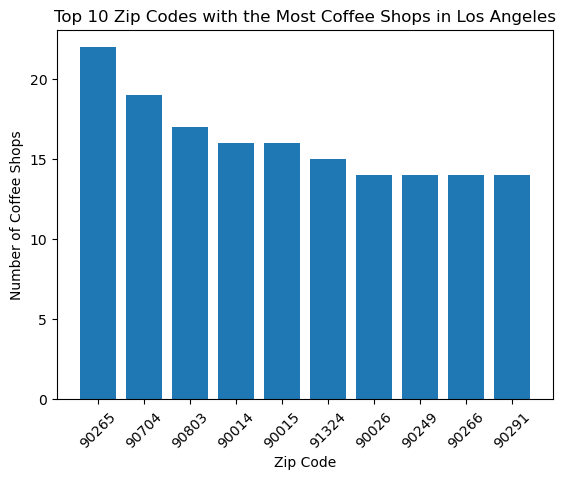

In [328]:
fig, ax = plt.subplots()
ax.bar(top10_coffee['zip_code'].astype(str), top10_coffee['num_coffee'])
ax.set_xlabel('Zip Code')
ax.set_ylabel('Number of Coffee Shops')
ax.set_title('Top 10 Zip Codes with the Most Coffee Shops in Los Angeles')
ax.set_xticklabels(top10_coffee['zip_code'].astype(str), rotation=45)  
plt.show()

In [329]:
# Top 10 Zip Codes with the Most stadium in Los Angeles
top10_stadium = df.nlargest(10, 'num_stadiums')
# only show the zip_code, place name and num_stadiums columns
top10_stadium = top10_stadium[['zip_code', 'Place Name', 'num_stadiums']]
top10_stadium



,zip_code,Place Name,num_stadiums
10,90012,"Los Angeles (Downtown Civic Center, Chinatown,...",27.0
13,90015,"Los Angeles (Dowtown Fashion District, South P...",17.0
26,90028,Los Angeles (Hollywood),13.0
178,91103,Pasadena,13.0
148,90746,Carson,10.0
34,90037,Los Angeles (South Los Angeles),9.0
151,90802,Long Beach,8.0
108,90401,Santa Monica (Downtown),7.0
243,91601,"Los Angeles (North Hollywood, Toluca Terrace)",7.0
22,90024,Los Angeles (Westwood),6.0


/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/3426543288.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10_stadium['zip_code'].astype(str), rotation=45)


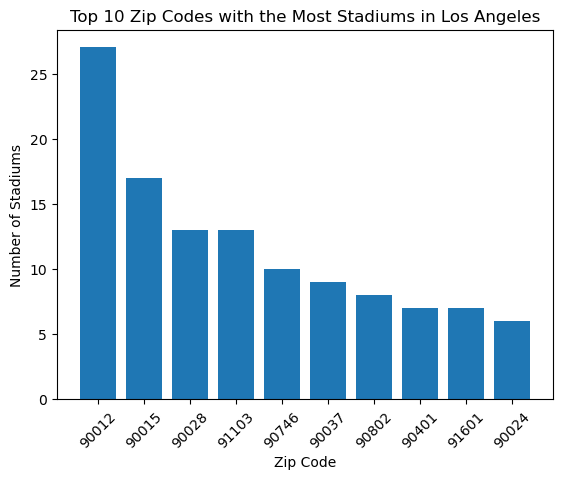

In [330]:
fig, ax = plt.subplots()
ax.bar(top10_stadium['zip_code'].astype(str), top10_stadium['num_stadiums'])
ax.set_xlabel('Zip Code')
ax.set_ylabel('Number of Stadiums')
ax.set_title('Top 10 Zip Codes with the Most Stadiums in Los Angeles')
ax.set_xticklabels(top10_stadium['zip_code'].astype(str), rotation=45)
plt.show()

In [331]:
# Top 10 Zip Codes with the Most Trader Joe's in Los Angeles
top10_traderjoes = df.nlargest(10, 'num_traderjoes')
# only show the zip_code, place name and num_traderjoes columns
top10_traderjoes = top10_traderjoes[['zip_code', 'Place Name', 'num_traderjoes']]
top10_traderjoes


,zip_code,Place Name,num_traderjoes
33,90036,"Los Angeles (Fairfax, Melrose, Miracle Mile, P...",2.0
43,90046,"Los Angeles (Hollywood), West Hollywood",2.0
54,90064,"Los Angeles (Cheviot Hills, Rancho Park)",2.0
91,90266,Manhattan Beach,2.0
95,90275,"Palos Verdes Estates, Rancho Palos Verdes, Rol...",2.0
173,91030,South Pasadena,2.0
182,91107,Pasadena,2.0
236,91423,"Los Angeles (Sherman Oaks, Van Nuys)",2.0
22,90024,Los Angeles (Westwood),1.0
25,90027,"Los Angeles (Griffith Park, Hollywood, Los Feliz)",1.0


/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/1158529436.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10_traderjoes['zip_code'].astype(str), rotation=45)


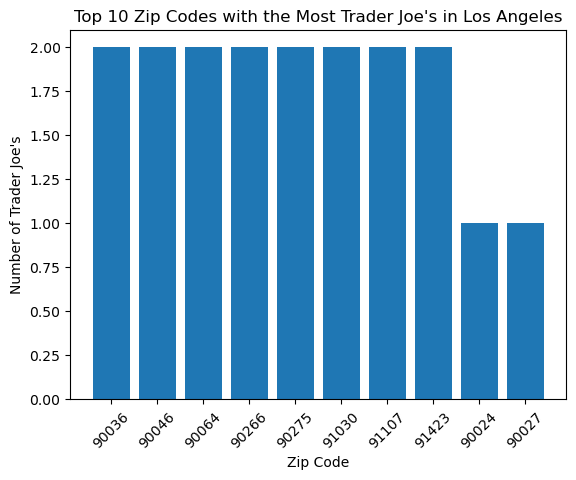

In [332]:
fig, ax = plt.subplots()
ax.bar(top10_traderjoes['zip_code'].astype(str), top10_traderjoes['num_traderjoes'])
ax.set_xlabel('Zip Code')
ax.set_ylabel('Number of Trader Joe\'s')
ax.set_title('Top 10 Zip Codes with the Most Trader Joe\'s in Los Angeles')
ax.set_xticklabels(top10_traderjoes['zip_code'].astype(str), rotation=45)
plt.show()

In [333]:
# Top 10 Zip Codes with the Most Population in Los Angeles
top10_population = df.nlargest(10, 'population')
# only show the zip_code, place name and population columns
top10_population = top10_population[['zip_code', 'Place Name', 'population']]
top10_population

,zip_code,Place Name,population
9,90011,Los Angeles (Southeast Los Angeles),106042
129,90650,Norwalk,101983
208,91331,"Los Angeles (Arleta, Hansen Hills, Pacoima)",99804
41,90044,"Athens, Los Angeles (South Los Angeles)",98990
154,90805,Long Beach (North Long Beach),96515
84,90250,Hawthorne (Holly Park),96200
67,90201,"Bell, Bell Gardens, Cudahy",95134
68,90201,"Bell, Bell Gardens, Cudahy",95134
211,91342,"Los Angeles (Lake View Terrace, Sylmar), Kagel...",92580
98,90280,South Gate,92262


/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/4250569339.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10_population['zip_code'].astype(str), rotation=45)


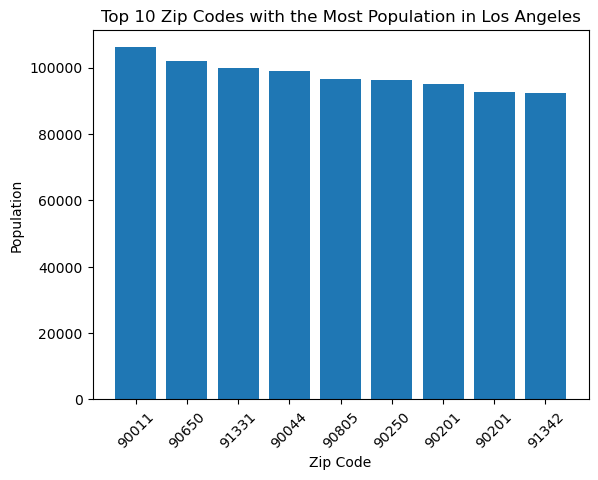

In [334]:
fig, ax = plt.subplots()
ax.bar(top10_population['zip_code'].astype(str), top10_population['population'])
ax.set_xlabel('Zip Code')
ax.set_ylabel('Population')
ax.set_title('Top 10 Zip Codes with the Most Population in Los Angeles')
ax.set_xticklabels(top10_population['zip_code'].astype(str), rotation=45)
plt.show()

In [335]:
# Top 10 Zip Codes with the Highest Median Income in Los Angeles
top10_median_income = df.nlargest(10, 'median_income')
# only show the zip_code, place name and median_income columns
top10_median_income = top10_median_income[['zip_code', 'Place Name', 'median_income']]
top10_median_income


,zip_code,Place Name,median_income
93,90272,"Los Angeles (Castellemare, Pacific Highlands, ...",225256.0
169,91011,La Ca帽ada Flintridge,210532.0
94,90274,"Palos Verdes Estates, Rolling Hills, Rolling H...",206013.0
62,90077,"Los Angeles (Bel Air Estates, Beverly Glen)",203194.0
91,90266,Manhattan Beach,187217.0
90,90265,Malibu,186264.0
183,91108,San Marino,173312.0
196,91302,"Calabasas, Hidden Hills, Monte Nido",172651.0
69,90210,Beverly Hills,172285.0
109,90402,Santa Monica,171844.0


/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/875546062.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10_median_income['zip_code'].astype(str), rotation=45)


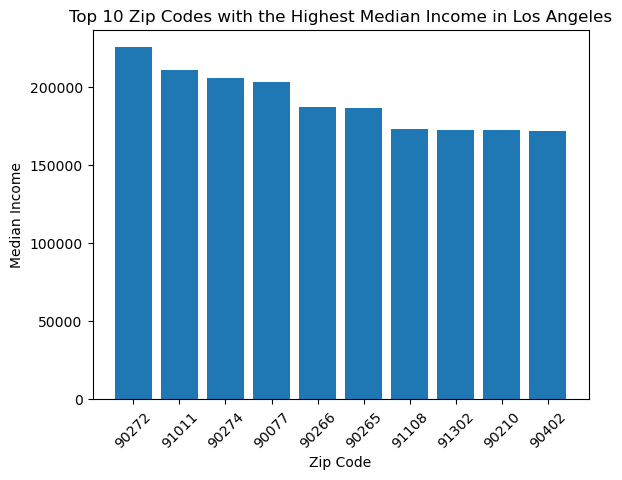

In [336]:
fig, ax = plt.subplots()
ax.bar(top10_median_income['zip_code'].astype(str), top10_median_income['median_income'])
ax.set_xlabel('Zip Code')
ax.set_ylabel('Median Income')
ax.set_title('Top 10 Zip Codes with the Highest Median Income in Los Angeles')
ax.set_xticklabels(top10_median_income['zip_code'].astype(str), rotation=45)
plt.show()


In [337]:
# Top 10 Zip Codes with the Highest Median Unit Price in Los Angeles
top10_median_unit_price = df.nlargest(10, 'median_unit_price')
# only show the zip_code, place name and median_unit_price columns
top10_median_unit_price = top10_median_unit_price[['zip_code', 'Place Name', 'median_unit_price']]
top10_median_unit_price

,zip_code,Place Name,median_unit_price
109,90402,Santa Monica,1546.003161
90,90265,Malibu,1418.256833
69,90210,Beverly Hills,1375.417012
91,90266,Manhattan Beach,1373.946857
93,90272,"Los Angeles (Castellemare, Pacific Highlands, ...",1260.964364
108,90401,Santa Monica (Downtown),1247.288503
100,90291,Los Angeles (Venice),1179.904246
85,90254,Hermosa Beach,1106.390839
62,90077,"Los Angeles (Bel Air Estates, Beverly Glen)",1090.778242
112,90405,"Santa Monica (Ocean Park, Santa Monica Airport...",1069.391635


/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/3347641425.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top10_median_unit_price['zip_code'].astype(str), rotation=45)


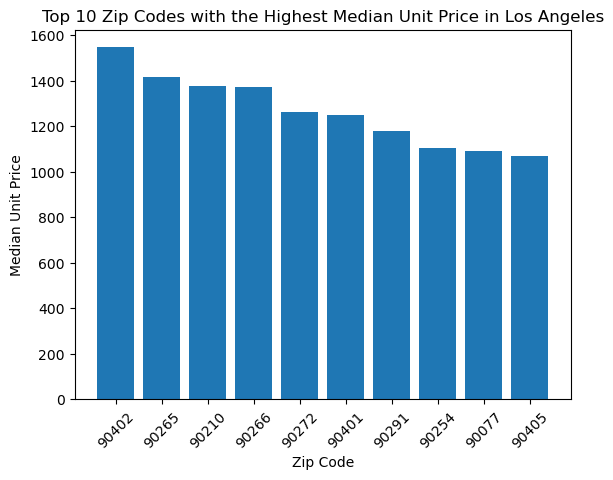

In [338]:
fig, ax = plt.subplots()
ax.bar(top10_median_unit_price['zip_code'].astype(str), top10_median_unit_price['median_unit_price'])
ax.set_xlabel('Zip Code')
ax.set_ylabel('Median Unit Price')
ax.set_title('Top 10 Zip Codes with the Highest Median Unit Price in Los Angeles')
ax.set_xticklabels(top10_median_unit_price['zip_code'].astype(str), rotation=45)
plt.show()


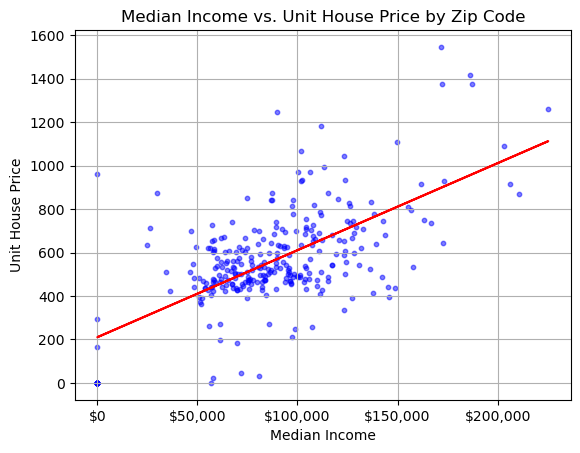

In [175]:
# figure out the relationship between median income and median unit price
fig, ax = plt.subplots()

ax.scatter(df['median_income'], df['median_unit_price'], s=10, color='blue', alpha=0.5)
ax.set_xlabel('Median Income')
ax.set_ylabel('Unit House Price')
ax.set_title('Median Income vs. Unit House Price by Zip Code')

m, b = np.polyfit(df['median_income'], df['median_unit_price'], 1)
ax.plot(df['median_income'], m * df['median_income'] + b, color='red')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.grid(True)
plt.show()


The scatter plot appears to show the areas with higher median incomes tend to have more expensive housing, which is consistent with common sense.

In [178]:
# Get the R squared value
cor1 = df['median_income'].corr(df['median_unit_price'])
r_squared1 = cor1 ** 2
r_squared1


0.416064982515834

The R squared value is 0.4160, We can conclude that median_income and median_unit_price in LA county has a moderate positive relationship.

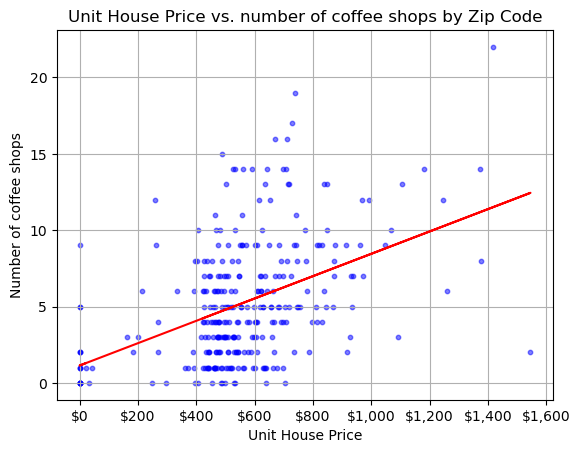

In [182]:
# figure out the relationship between median unit price and number of coffee shops
fig, ax = plt.subplots()

ax.scatter(df['median_unit_price'], df['num_coffee'], s=10, color='blue', alpha=0.5)
ax.set_xlabel('Unit House Price')
ax.set_ylabel('Number of coffee shops')
ax.set_title('Unit House Price vs. number of coffee shops by Zip Code')

m, b = np.polyfit(df['median_unit_price'], df['num_coffee'], 1)
ax.plot(df['median_unit_price'], m * df['median_unit_price'] + b, color='red')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.grid(True)
plt.show()

In [181]:
# Get the R squared value
cor2 = df['median_unit_price'].corr(df['num_coffee'])
r_squared2 = cor2 ** 2
r_squared2

0.19322784996083242

The R squared value is 0.1932, which is very low. We can conclude that median_income and median_unit_price in LA county can be considered no relationship.

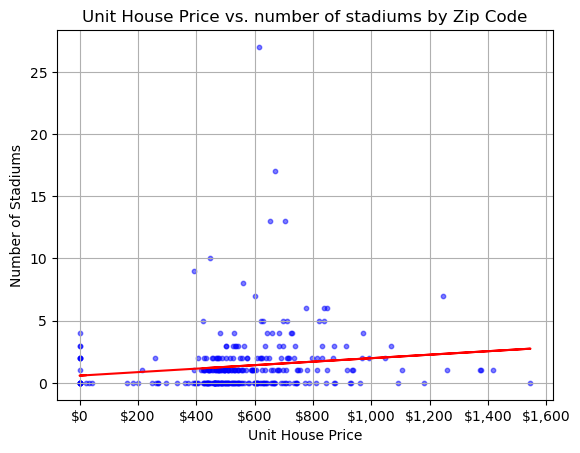

In [183]:
# figure out the relationship between median unit price and number of stadiums
fig, ax = plt.subplots()

ax.scatter(df['median_unit_price'], df['num_stadiums'], s=10, color='blue', alpha=0.5)
ax.set_xlabel('Unit House Price')
ax.set_ylabel('Number of Stadiums')
ax.set_title('Unit House Price vs. number of stadiums by Zip Code')

m, b = np.polyfit(df['median_unit_price'], df['num_stadiums'], 1)
ax.plot(df['median_unit_price'], m * df['median_unit_price'] + b, color='red')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.grid(True)
plt.show()

In [184]:
# Get the R squared value
cor3 = df['median_unit_price'].corr(df['num_stadiums'])
r_squared3 = cor3 ** 2
r_squared3

0.017571888073036706

The R squared value is 0.0175, which is very low. We can conclude that Unit House Price and Number of Stadiums in LA county can be considered no relationship.

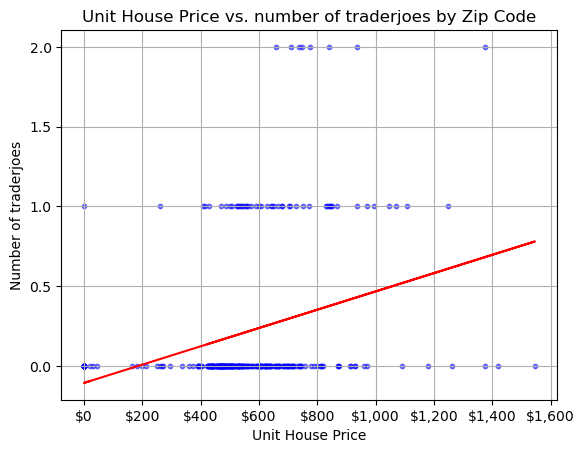

In [185]:
# figure out the relationship between median unit price and number of trader joes
fig, ax = plt.subplots()

ax.scatter(df['median_unit_price'], df['num_traderjoes'], s=10, color='blue', alpha=0.5)
ax.set_xlabel('Unit House Price')
ax.set_ylabel('Number of traderjoes')
ax.set_title('Unit House Price vs. number of traderjoes by Zip Code')

m, b = np.polyfit(df['median_unit_price'], df['num_traderjoes'], 1)
ax.plot(df['median_unit_price'], m * df['median_unit_price'] + b, color='red')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.grid(True)
plt.show()

In [186]:
# Get the R squared value
cor4 = df['median_unit_price'].corr(df['num_traderjoes'])
r_squared4 = cor4 ** 2
r_squared4

0.08695126047480838

The R squared value is 0.087, which is very low. We can conclude that Unit House Price and Number of trader joes in LA county can be considered no relationship.

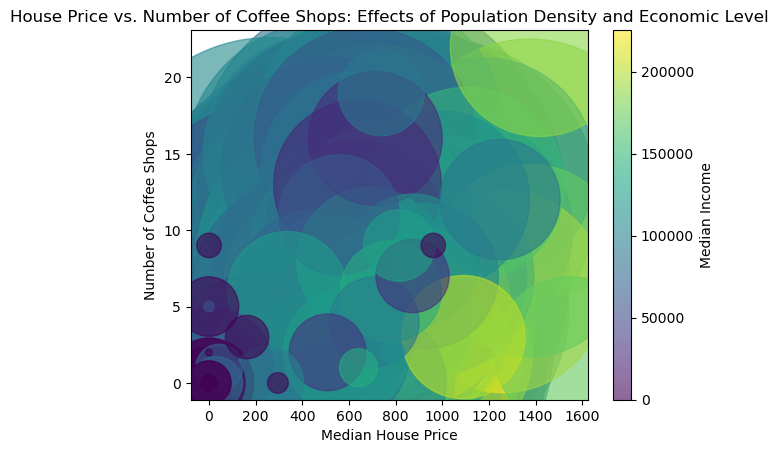

In [344]:
fig, ax = plt.subplots()

# Use population density to determine the size of the points and economic level to determine the color
scatter = ax.scatter(df['median_unit_price'], df['num_coffee'], 
                     c=df['median_income'],   # Color based on economic level
                     s=df['population'],  # Size based on population density
                     cmap='viridis', alpha=0.6)  # Color map and transparency

# Add a color bar
plt.colorbar(scatter, ax=ax, label='Median Income')

# Set axis labels and chart title
ax.set_xlabel('Median House Price')
ax.set_ylabel('Number of Coffee Shops')
ax.set_title('House Price vs. Number of Coffee Shops: Effects of Population Density and Economic Level')

# Display the plot
plt.show()


This chart illustrates the relationship between house prices, the number of coffee shops, and median income. The X-axis represents the median house price, the Y-axis indicates the number of coffee shops, and the color gradient represents different levels of median income, ranging from 0 to $200,000.
As house prices increase, the number of coffee shops also tends to increase, especially in areas where the house price is above 600, where there is a notable rise in the number of coffee shops.
Higher median incomes (represented by darker shades) are concentrated in areas with higher house prices, which also have a higher number of coffee shops.
Lower-income areas (represented by purple and blue shades) tend to have fewer coffee shops and lower house prices.
This chart suggests a trend where economically higher-level areas (those with higher median incomes and house prices) tend to have more coffee shops. This reflects the greater purchasing power and higher demand for coffee shop services among higher-income groups. 

In [345]:
# delete the data with 0 population
df = df[df['population'] != 0]
# order by population
df = df1.sort_values(by='population', ascending=False)
df

# get the range of longitude and latitude
print(df['latitude'].min())
print(df['latitude'].max())
print(df['longitude'].min())
print(df['longitude'].max())

33.332
37.989
-119.1234
-115.9671


In [220]:
conda install -c conda-forge geopandas


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.4.0



## Package Plan ##

  environment location: /Users/yaoyuxin/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.7.2               |     pyhd8ed1ab_0          28 KB  conda-forge
    ca-certificates-2024.2.2   |       hf0a4a13_0         152 KB  conda-forge
    cairo-1.16.0               |       h302bd0f_5         1.0 MB
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.2                |     pyhd8ed1ab_1  

In [224]:
!pip install contextily



  Obtaining dependency information for contextily from https://files.pythonhosted.org/packages/d2/84/dbcd682289fe8fa3f7c16318e06a7626608f767a9a163954df58f245adef/contextily-1.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for mercantile from https://files.pythonhosted.org/packages/b2/d6/de0cc74f8d36976aeca0dd2e9cbf711882ff8e177495115fd82459afdc4d/mercantile-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/4f/f7/e4ac8f3dfd11e4c718e9281a7e41417462100bc0bc575059a8eeab1e8bf0/rasterio-1.3.10-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/ge

In [346]:
# remove the outlier of longitude and latitude
df = df[df['longitude'] < -117]
df = df[df['latitude'] < 34.5]
df

,zip_code,Place Name,population,median_income,median_unit_price,num_traderjoes,num_stadiums,num_coffee,longitude,latitude
9,90011,Los Angeles (Southeast Los Angeles),106042,51819.0,361.801242,0.0,0.0,1.0,-118.2582,34.0079
129,90650,Norwalk,101983,91259.0,529.639276,0.0,4.0,3.0,-118.0818,33.9056
208,91331,"Los Angeles (Arleta, Hansen Hills, Pacoima)",99804,76942.0,456.460674,0.0,0.0,5.0,-118.4208,34.2556
41,90044,"Athens, Los Angeles (South Los Angeles)",98990,48386.0,443.542559,0.0,1.0,2.0,-118.2901,33.9551
154,90805,Long Beach (North Long Beach),96515,64848.0,518.253782,0.0,1.0,1.0,-118.1801,33.8635
...,...,...,...,...,...,...,...,...,...,...
268,91759,Mount Baldy (Portion in LA County),299,111071.0,788.043478,0.0,0.0,2.0,-118.2987,33.7866
176,91046,Glendale (Verdugo City),141,0.0,0.000000,0.0,0.0,0.0,-118.2987,33.7866
162,90822,Long Beach,125,0.0,0.000000,0.0,0.0,0.0,-118.1638,33.7927
249,91608,Universal City,56,56898.0,0.000000,0.0,3.0,5.0,-118.3528,34.1383


In [350]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Point
import contextily as ctx


gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/1503794344.py:7: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xmin, ymin = transform(in_proj, out_proj, lon_min, lat_min)
/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/1503794344.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xmax, ymax = transform(in_proj, out_proj, lon_max, lat_max)


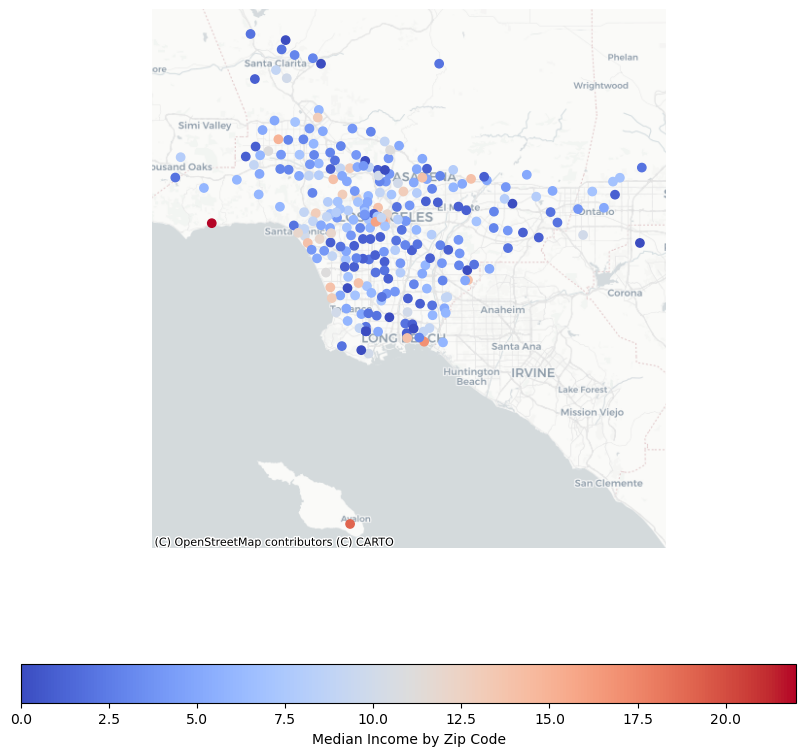

In [348]:
# Set the Coordinate Reference System (CRS) to WGS 84
gdf = gdf.set_crs("epsg:4326")
gdf = gdf.to_crs(epsg=3857)


# Transform the boundaries to Web Mercator
xmin, ymin = transform(in_proj, out_proj, lon_min, lat_min)
xmax, ymax = transform(in_proj, out_proj, lon_max, lat_max)

# Create a GeoDataFrame with the boundaries
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='num_coffee', cmap='coolwarm', legend=True,
         legend_kwds={'label': "Median Income by Zip Code",
                      'orientation': "horizontal"})


# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()


/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/1382289647.py:11: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xmin, ymin = transform(in_proj, out_proj, lon_min, lat_min)
/var/folders/yx/zdlctwlj64v4nfdmvp4hj_qw0000gn/T/ipykernel_6205/1382289647.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xmax, ymax = transform(in_proj, out_proj, lon_max, lat_max)


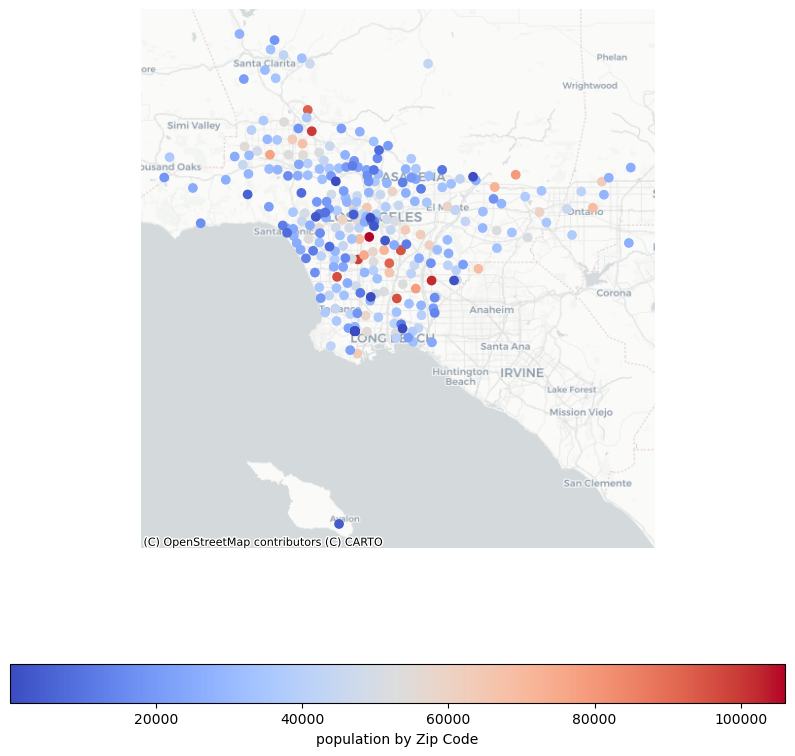

In [351]:

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude)
)
# Set the Coordinate Reference System (CRS) to WGS 84
gdf = gdf.set_crs("epsg:4326")
gdf = gdf.to_crs(epsg=3857)


# Transform the boundaries to Web Mercator
xmin, ymin = transform(in_proj, out_proj, lon_min, lat_min)
xmax, ymax = transform(in_proj, out_proj, lon_max, lat_max)

# Create a GeoDataFrame with the boundaries
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='population', cmap='coolwarm', legend=True,
         legend_kwds={'label': "population by Zip Code",
                      'orientation': "horizontal"})


# Add a basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()